<a href="https://colab.research.google.com/github/HanHoHyeong/H3/blob/main/overfitting_test(%EC%99%84%EC%84%B1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

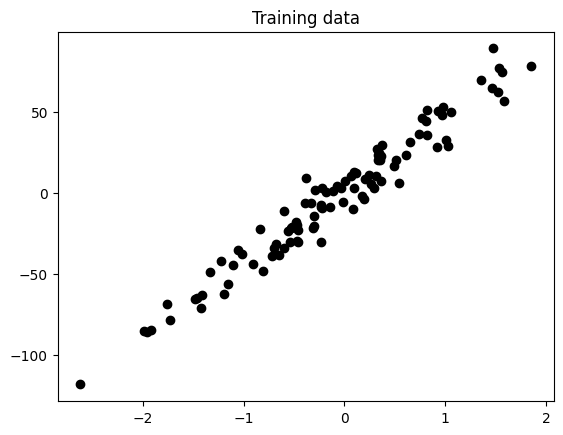

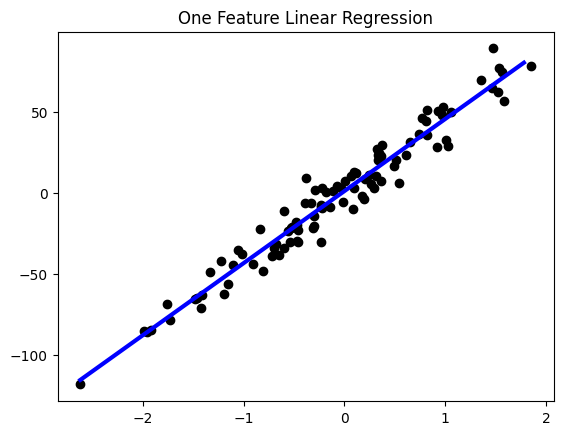

-0.3479	-0.8690	1.0901	2.8422	-0.2460	42.9609	


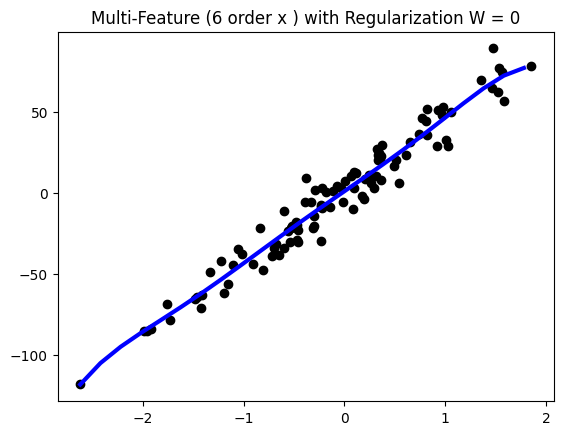

-0.3851	-0.9792	1.2395	3.3447	-0.3724	42.4601	


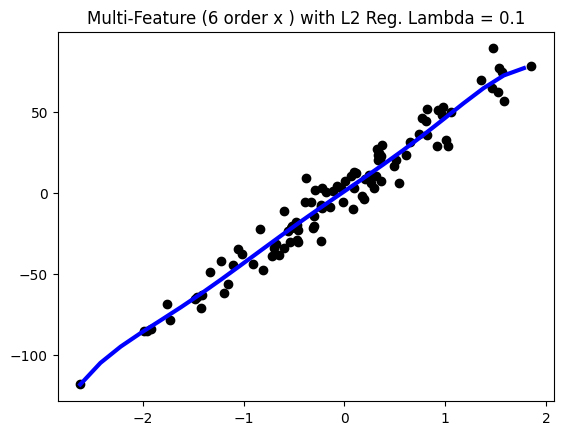

-0.6010	-1.6702	2.0596	6.6300	-0.9451	38.9475	


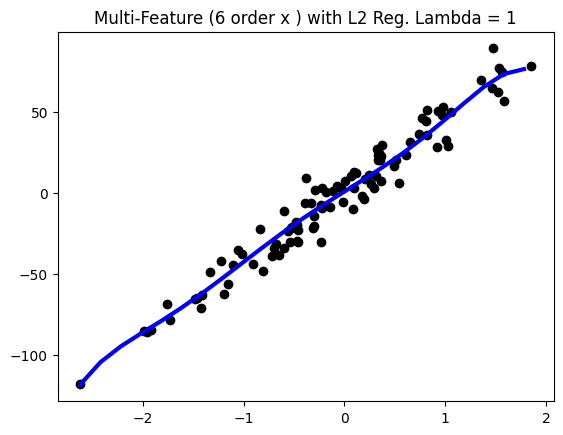

-0.1902	-0.4579	0.5589	1.4675	0.0000	43.5327	


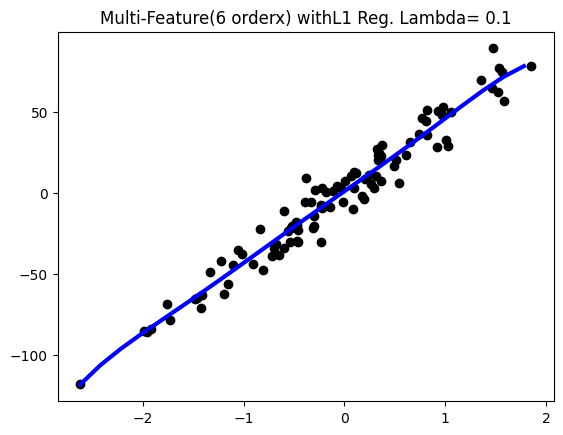

0.0099	0.0000	0.0000	0.7665	0.0000	41.4991	


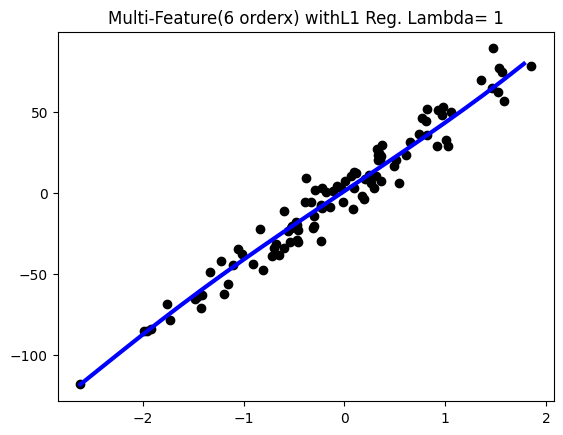

In [6]:
!pip install DataLoader
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from torch.utils.data import DataLoader
import numpy as np
from sklearn.datasets import make_regression

def print_coef(coef):
  coef_array = coef.flatten()
  for val in coef_array:
    print("%.4f" % val, end="\t")
  print("")

def make_6_order_feature_vecs(x):
  x1 = x
  x2 = x * x
  x3 = x2 * x
  x4 = x3 * x
  x5 = x4 * x
  x6 = x5 * x

  x1 = x1.reshape(-1, 1)
  x2 = x2.reshape(-1, 1)
  x3 = x3.reshape(-1, 1)
  x4 = x4.reshape(-1, 1)
  x5 = x5.reshape(-1, 1)
  x6 = x6.reshape(-1, 1)
  features = np.concatenate((x6, x5, x4, x3, x2, x1), axis=1)

  return features

def linear_regression_overfit_example():
  # Load the wine features, wine quality dataset
  x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

  x_train= x.reshape(-1, 1)
  y_train= y.reshape(-1, 1)

  regr= linear_model.LinearRegression()
  # Train the model using the training sets
  regr.fit(x_train, y_train)

  # Make predictions using the testing set
  x_min= x.min()
  x_max= x.max()
  step = 0.2
  test_x = np.arange(x_min, x_max, step).reshape(-1, 1)
  y_pred= regr.predict(test_x)
  # Plot outputs
  plt.scatter(x_train, y_train, color='black')
  # plt.xticks(np.arange(0, 10, step=1))
  # plt.yticks(np.arange(6, 12, step=1))
  # plt.ylim([5, 13])
  plt.title('Training data')
  plt.show()

  # Plot outputs
  plt.scatter(x_train, y_train, color='black')
  plt.plot(test_x, y_pred, color='blue', linewidth=3)
  # plt.xticks(np.arange(0, 10, step=1))
  # plt.yticks(np.arange(6, 12, step=1))
  # plt.ylim([5, 13])
  plt.title('One Feature Linear Regression')
  plt.show()

  features = make_6_order_feature_vecs(x)
  features = features.reshape(-1, 6)
  regr_multi= linear_model.LinearRegression()

  regr_multi.fit(features, y_train)

  # Make predictions using the testing set
  x_min= x.min()
  x_max= x.max()
  step = 0.2
  test_x = np.arange(x_min, x_max, step).reshape(-1, 1)
  test_features= make_6_order_feature_vecs(test_x)

  y_pred= regr_multi.predict(test_features)
  print_coef(regr_multi.coef_)
  # Plot outputs
  plt.scatter(x_train, y_train, color='black')
  plt.plot(test_x, y_pred, color='blue', linewidth=3)
  # plt.xticks(np.arange(0, 10, step=1))
  # plt.yticks(np.arange(6, 12, step=1))
  # plt.ylim([5, 13])
  plt.title('Multi-Feature (6 order x ) with Regularization W = 0')
  plt.show()

  # L2 Regularization W = 0.1
  ridge = linear_model.Ridge(alpha=0.1)
  ridge.fit(features, y_train)
  y_pred= ridge.predict(test_features)
  print_coef(ridge.coef_)
  # Plot outputs
  plt.scatter(x_train, y_train, color='black')
  plt.plot(test_x, y_pred, color='blue', linewidth=3)
  # plt.xticks(np.arange(0, 10, step=1))
  # plt.yticks(np.arange(6, 12, step=1))
  # plt.ylim([5, 13])
  plt.title('Multi-Feature (6 order x ) with L2 Reg. Lambda = 0.1')
  plt.show()

  # L2 Regularization W = 1
  ridge = linear_model.Ridge(alpha=1.0)
  ridge.fit(features, y_train)
  y_pred= ridge.predict(test_features)
  print_coef(ridge.coef_)
  # Plot outputs
  plt.scatter(x_train, y_train, color='black')
  plt.plot(test_x, y_pred, color='blue', linewidth=3)
  # plt.xticks(np.arange(0, 10, step=1))
  # plt.yticks(np.arange(6, 12, step=1))
  # plt.ylim([5, 13])
  plt.title('Multi-Feature (6 order x ) with L2 Reg. Lambda = 1')
  plt.show()

  # L1 Regularization W= 0.1
  lasso= linear_model.Lasso(alpha=0.1)
  lasso.fit(features, y_train)
  y_pred= lasso.predict(test_features)
  print_coef(lasso.coef_)
  # Plotoutputs
  plt.scatter(x_train, y_train, color='black')
  plt.plot(test_x, y_pred, color='blue', linewidth=3)
  # plt.xticks(np.arange(0, 10, step=1))
  # plt.yticks(np.arange(6, 12, step=1))
  # plt.ylim([5, 13])
  plt.title('Multi-Feature(6 orderx) withL1 Reg. Lambda= 0.1')
  plt.show()

  # L1 Regularization W= 1
  lasso= linear_model.Lasso(alpha=1.0)
  lasso.fit(features, y_train)
  y_pred= lasso.predict(test_features)
  print_coef(lasso.coef_)
  # Plotoutputs
  plt.scatter(x_train, y_train, color='black')
  plt.plot(test_x, y_pred, color='blue', linewidth=3)
  # plt.xticks(np.arange(0, 10, step=1))
  # plt.yticks(np.arange(6, 12, step=1))
  # plt.ylim([5, 13])
  plt.title('Multi-Feature(6 orderx) withL1 Reg. Lambda= 1')
  plt.show()

linear_regression_overfit_example()

DataLoader 오류가 왜 나는지 알아내야함.들여쓰기 제대로

---



---

